In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import StressTools as tools
import utils
import fitting
import cycloidData
from scipy import stats, interpolate

In [2]:
cycloids = cycloidData.loadAllCycloids()

## Test With Cubic interpolation

300

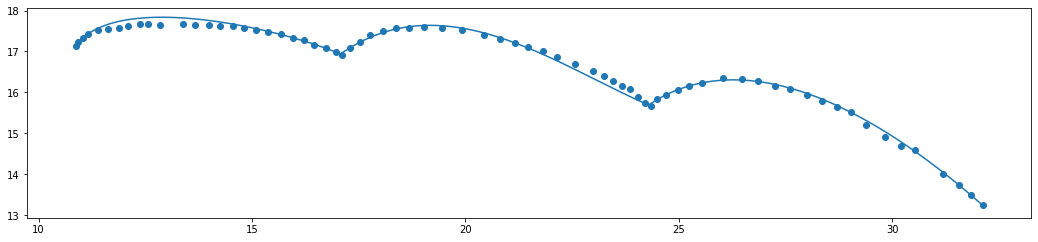

In [3]:
arcPoints = cycloids['alex'].arcs[0]
arc = cycloids['alex'].curve

lonRange = arc['lon'].max() - arc['lon'].min()
latRange = arc['lat'].max() - arc['lat'].min()

ratio = latRange / lonRange

# arc = fitting.createCycloidBezier(cycloids['alex'].arcs, maxError=0.09)
allPoints = pd.DataFrame(np.vstack(cycloids['alex'].arcs), columns=['lon', 'lat'])

plt.figure(figsize=(18,18*ratio))
plt.plot(arc['lon'], arc['lat'])
plt.scatter(allPoints['lon'], allPoints['lat'])


# func = interpolate.interp1d(arcPoints['lon'], arcPoints['lat'], kind='cubic')
# minVal = arc['lon'].min()
# maxVal = arc['lon'].max()
# step = (maxVal - minVal) / 100

# steps = np.array([arc['lon'].iloc[0], *np.arange(minVal, maxVal, step), arc['lon'].iloc[-1]])
# lats = func(steps)

# plt.figure(figsize=(12,2))
# plt.plot(steps, lats)
# plt.scatter(arcPoints['lon'], arcPoints['lat'], alpha=0.25)

display(len(arc))

### The result is quite lumpy

## Let's Try Regression Lines

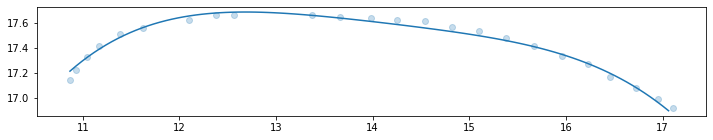

In [16]:
import numpy.polynomial.polynomial as poly

plt.figure(figsize=(12,2))
coefs = poly.polyfit(arc['lon'], arc['lat'], 4)
lats = poly.polyval(steps, coefs)

plt.plot(steps, lats)
plt.scatter(arcPoints['lon'], arcPoints['lat'], alpha=0.25)

In [6]:
coefs

array([-1.33746616e+04,  6.49985502e+03, -1.34920795e+03,  1.55269634e+02,
       -1.06993872e+01,  4.41478027e-01, -1.01000547e-02,  9.88307959e-05])

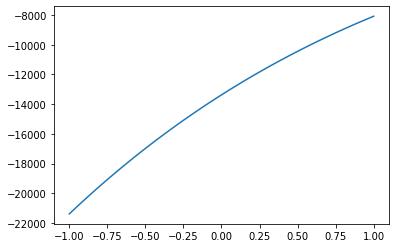

In [7]:
p = poly.Polynomial(coefs)

plt.plot(*p.linspace())

In [8]:
arcPoints

,lon,lat
0,10.867,17.140
1,10.925,17.221
2,11.041,17.326
3,11.168,17.418
4,11.389,17.511
5,11.621,17.558
6,11.876,17.581
7,12.096,17.627
8,12.375,17.662
9,12.560,17.662


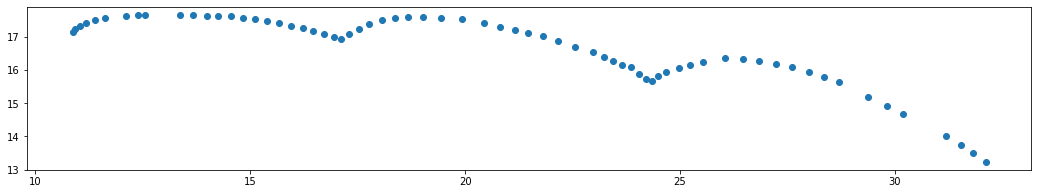

In [11]:
df = pd.read_csv('./obsDataCorrected/Alex.csv')

plt.figure(figsize=(18, 3))
plt.scatter(df['lon'], df['lat'])

In [19]:
arc

,pointNumber,lon,lat,heading,headingCategory,isCusp
0,1,10.867000,17.140000,215.604534,216.0,True
1,2,10.877784,17.154740,216.772886,217.0,False
2,3,10.888821,17.169201,217.935373,218.0,False
3,4,10.900109,17.183384,219.091023,219.0,False
4,5,10.911643,17.197294,220.238897,220.0,False
...,...,...,...,...,...,...
95,96,12.475463,17.661750,269.629906,270.0,False
96,97,12.492626,17.661847,269.719667,270.0,False
97,98,12.509665,17.661918,269.801680,270.0,False
98,99,12.526577,17.661965,269.875829,270.0,False


500

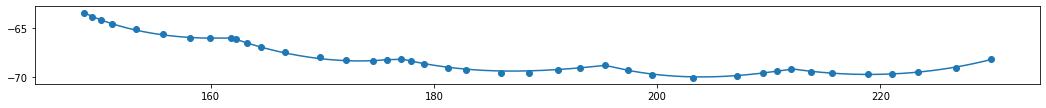

In [6]:
arcPoints = cycloids['delphi'].arcs[0]
arc = cycloids['delphi'].curve


lonRange = arc['lon'].max() - arc['lon'].min()
latRange = arc['lat'].max() - arc['lat'].min()

ratio = latRange / lonRange

allPoints = pd.DataFrame(np.vstack(cycloids['delphi'].arcs), columns=['lon', 'lat'])
# allPoints = cycloids['delphi'].arcs[3]

plt.figure(figsize=(18,18*ratio))
plt.plot(arc['lon'], arc['lat'])
plt.scatter(allPoints['lon'], allPoints['lat'])


# func = interpolate.interp1d(arcPoints['lon'], arcPoints['lat'], kind='cubic')
# minVal = arc['lon'].min()
# maxVal = arc['lon'].max()
# step = (maxVal - minVal) / 100

# steps = np.array([arc['lon'].iloc[0], *np.arange(minVal, maxVal, step), arc['lon'].iloc[-1]])
# lats = func(steps)

# plt.figure(figsize=(12,2))
# plt.plot(steps, lats)
# plt.scatter(arcPoints['lon'], arcPoints['lat'], alpha=0.25)

display(len(arc))

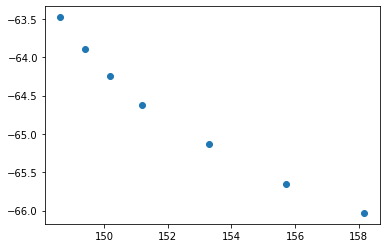

In [16]:
allPoints = cycloids['delphi'].arcs[4]
plt.scatter(allPoints['lon'], allPoints['lat'])